In [10]:
from sympy import *
init_printing()

### Notation

$d_q$: queuing delay

$w$: congestion window

$R_m$: minimum RTT (propagation delay)

$\mu$: link rate

$B = \mu R_m$: BDP

$R = w/\mu$: RTT

Note, $d_q = \left(\frac{w - B}{\mu}\right)^+$


### Stability condition

For an instant TCP, let $\tau(d_q, w)$ give the target congestion window. It is stable only if 

$$ -\frac{\pi}{2} < \frac{d \tau(d_q, w)}{d w} < 0 $$

Remember, we need to consider $d_q$'s dependence on $w$ in the derivative.

In [111]:
d_q, w, R_m, mu, B, R = symbols('d_q w R_m \\mu B R')

### Sqrt Instant TCP
Consider an instant TCP of the form $\tau(d_q, w) = \frac{\alpha(w) R}{\sqrt{d_q}}$. We need to find $\alpha(w)$ such that this is stable. We picked sqrt because we believe that it will lead to a unique equilibrium point irrespective of the number of senders.

**Note:** Turns out this intuition was wrong, since when we solve for $\alpha$, we get a $w$ in the numerator which leads to infinitely many solutions

Now, assume that, instead of writing $\alpha$ as a function of cwnd, we can write it in terms of the BDP, $B$. In some cases, this will still lead to a stable solution.


In [112]:
tau, alpha = symbols('\\tau \\alpha')

tau = alpha * R / sqrt(d_q)

Let us first find the equilibirum cwnd size for this, $w_0$

In [114]:
eqn = (tau - w).subs(d_q, (w - B) / mu).subs(R, w/mu)
w_0 = solve(eqn, w)[1]
w_0

Now, to apply the stability condition we differentiate $\tau$, set it to $-\pi/2$ and solve for $\alpha$

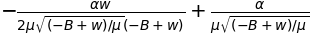

In [115]:
# Differentiate
tau_w = diff(tau.subs(d_q, (w - B) / mu).subs(R, w/mu), w)
tau_w

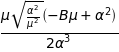

In [116]:
# Substitute w_0 and simplify
tau_w__2 = simplify(tau_w.subs(w, w_0))
tau_w__2

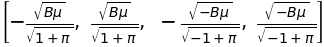

In [117]:
# Set to pi/2 and solve for alpha
alpha_solns = solve(tau_w__2 - pi / 2, alpha)
alpha_solns

In [118]:
# Pick the real and positive solution
alpha_soln = alpha_solns[1]

We now have an alpha for which this algorithm should be stable. Let's see what the resultant $tau(d_q, w)$ looks like

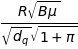

In [119]:
tau_with_B = tau.subs(alpha, alpha_soln)
tau_with_B

In practice, we estimate $B$ as $B = w * R_m / R$. Let's plug that in

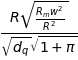

In [128]:
simplify(tau_with_B.subs(B, w * R_m / R).subs(mu * R_m, B).subs(B, w * R_m / R))